## 安装依赖包

In [1]:
%pip install diffusers transformers xformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.9 MB/s eta 0:00:00


In [2]:
%pip install opencv-contrib-python
%pip install controlnet_aux

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
from PIL import Image

def draw_image_grids(images, rows, cols):
  # Create a rows x cols grid for displaying the images
  fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

  for row in range(rows):
    for col in range(cols):
      axes[row, col].imshow(images[col + row * cols])
  for ax in axes.flatten():
      ax.axis('off')
  # Display the grid
  plt.show()

## 获取Scribble的图片，并画图

In [2]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-scribble", torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
)
pipe.enable_model_cpu_offload()
pipe.enable_xformers_memory_efficient_attention()

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [11]:
from diffusers.utils import load_image

image_file = "/content/drive/MyDrive/colab_data/controlnet/scribble_dog.png"
scribble_image = load_image(image_file)

In [19]:
generator = [torch.Generator(device="cpu").manual_seed(2) for i in range(4)]
prompt = "dog"
prompt = [prompt + t for t in [" in a room", " near the lake", " on the street", " in the forrest"]]
output = pipe(
    prompt,
    scribble_image,
    negative_prompt=["lowres, bad anatomy, worst quality, low quality"] * 4,
    generator=generator,
    num_inference_steps=50,
)

  0%|          | 0/50 [00:00<?, ?it/s]

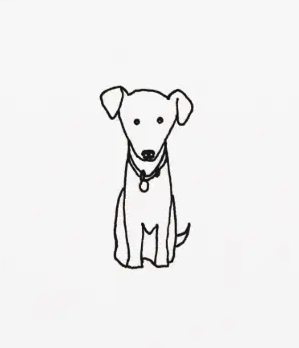

In [12]:
scribble_image

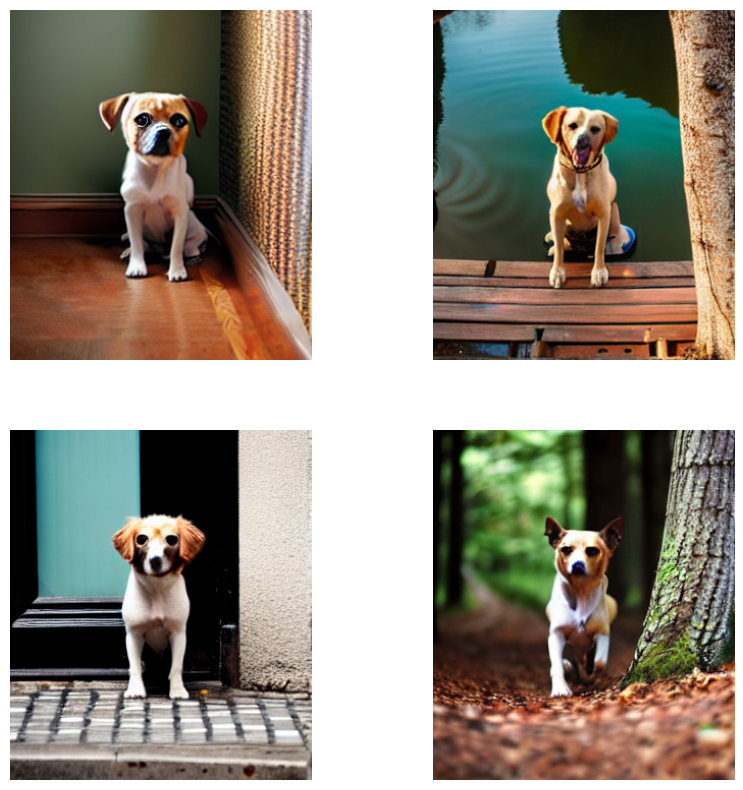

In [20]:
draw_image_grids(output.images, 2, 2)